# Projeto 2 | Ciência dos Dados

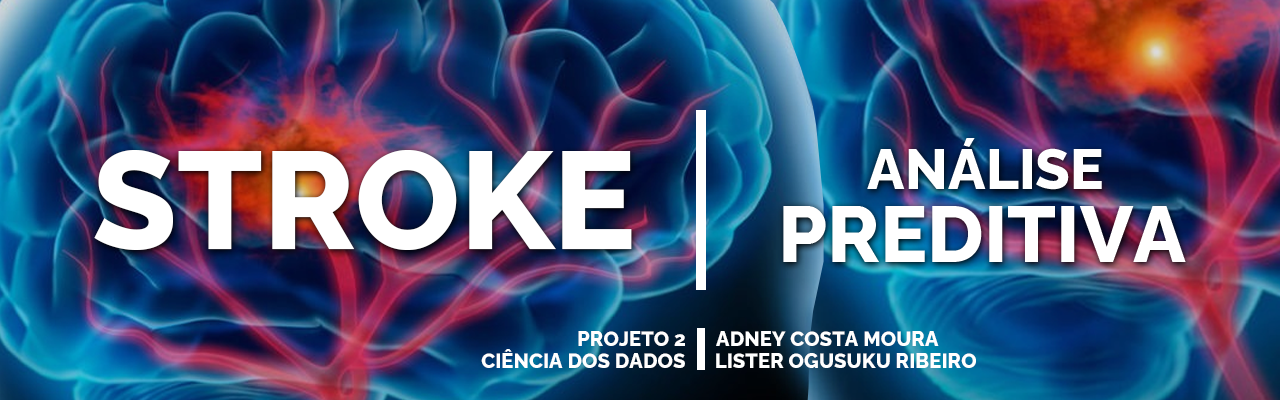

### Contextualização

Nós alunos do Insper recebemos uma base de dados do Ministério da Saúde com os dados de milhares de pacientes e foi nos dada a missão de realizar uma análise preditiva para tentar prever quais as chances de determinados pacientes terem ou não um AVC (Acidente Vascular Cerebral) com base em dados como hipertensão, nível de glicose no sangue, hábitos de fumo, entre outros.

Para isso, observamos que a melhor forma de realizar essa análise seria extraindo os dados recebidos e manipulando-os de modo a obter uma maior acurácia na nossa predição.

### Contexto

De acordo com a Organização Mundial da Saúde (OMS), Acidente Vascular Cerebral (AVC) é a segunda principal causa de mortes no mundo inteiro, o que corresponde a cerca de 11% do total.
Este dataset é usado para predizer se um paciente possui tendências a ter um AVC ou não, com base em parâmetros como gênero, idade, doenças variadas e status de fumante. Cada linha da base de dados revelam informações relevantes sobre os pacientes.


<hr>

## Pergunta principal:

A principal pergunta que desejamos responder é: "Será que os fatores de nível de glicose no sangue, hipertensão, hábitos de fumo, idade e índice de massa corporal afetam de alguma forma o fato de alguém ter ou não um AVC?"

<hr>

### Informação dos atributos da base de dados

* 1) id: identificador único
* 2) gender: "Masculino", "Feminino" ou"Outro"
* 3) age: idade do paciente
* 4) hypertension: 0 se o paciente não tem hipertensão, 1 se o paciente não tem hipertensão
* 5) heart_disease: 0 se o paciente não possui doenças relacionadas ao coração, 1 se o paciente possui doenças relacionadas ao coração
* 6) ever_married: "Não" or "Sim"
* 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* 8) Residence_type: "Rural" ou "Urbana"
* 9) avg_glucose_level: nível médio de glicose no sangue
* 10) bmi: índice de gordura corporal
* 11) smoking_status: "ex-fumante", "nunca fumou", "fumante" or "Desconhecido"*
* 12) stroke: 1 se o paciente teve AVC, 0 se não teve AVC
* *Nota: "Desconhecido" é um "smoking_status" que significa que a informação não está disponível para este paciente.

#### Bibliotecas importadas

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import emoji
import seaborn as sns

#### Diretório e base de dados

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\adney\OneDrive - Insper - Institudo de Ensino e Pesquisa\Documentos\2° semestre - Insper\Ciência dos Dados\Projeto2Cdados_AdneyLister\Projeto2-Cdados


In [3]:
stroke = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
stroke.shape[0]

5110

#### Limpeza de dados

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

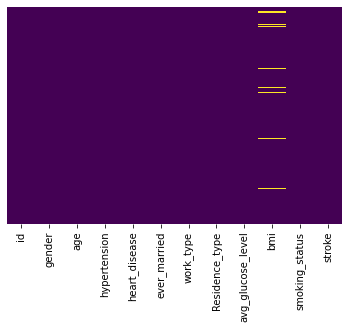

In [5]:
#heatmap da biblioteca seaborn para identificar elementos nulos ,bem como, o comando isnull que verifica linhas nulas
sns.heatmap(stroke.isnull(),yticklabels=False,cbar=False,cmap="viridis")
stroke.isnull().sum()

In [6]:
stroke.dropna(inplace=True)
stroke

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  14180  Female  13.0             0              0           No   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
5           Private          Urban             186.21  29.0  formerly smoked   
...             ...            ...                ...   ...              ...   
5104       children          Rural             103.08  18.6          Unknown   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
2          1  
3          1  
4          1  
5          1  
...      ...  
5104       0  
5106       0  
5107       0  
5108       0  
5109       0  

[4909 rows x 12 columns]

In [7]:
stroke.shape[0]

4909

In [8]:
stroke.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [9]:
filtro = stroke.gender != 'Other'
stroke = stroke[filtro]

In [10]:
stroke.gender.value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

# Análises Iniciais

###### Vamos filtrar nossos dados localizando e separando pessoas que tiveram AVC das que não tiveram:

In [11]:
stroke_yes = stroke.loc[stroke["stroke"] == 1]
stroke_no = stroke.loc[stroke["stroke"] == 0]
print(f"{stroke_yes.shape[0]}, {stroke_no.shape[0]}")

209, 4699


# Idade

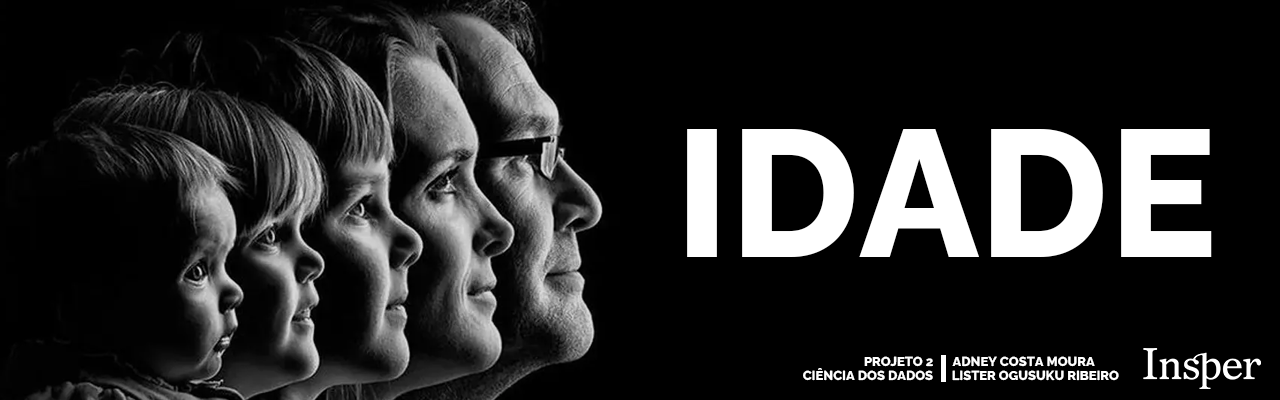

In [12]:
stroke.age.describe()

count    4908.000000
mean       42.868810
std        22.556128
min         0.080000
25%        25.000000
50%        44.000000
75%        60.000000
max        82.000000
Name: age, dtype: float64

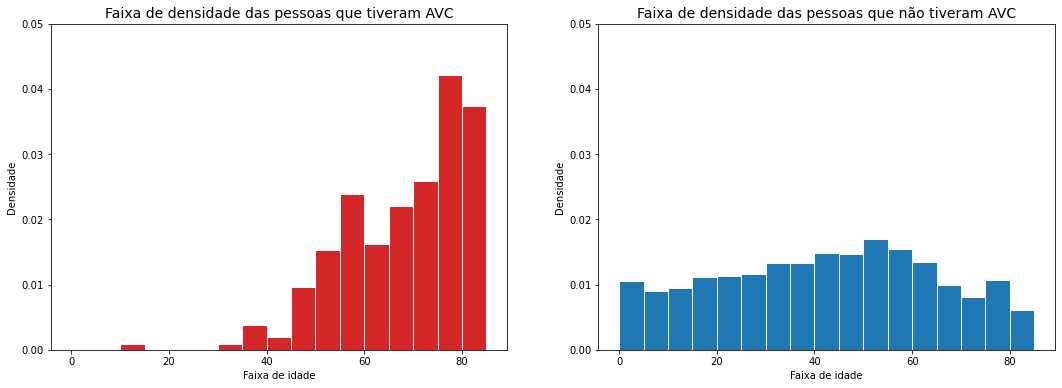

In [13]:
age_range = np.arange(0, 90,5)

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.hist(stroke_yes.age, bins = age_range, edgecolor='white', density = True, color = 'tab:red')
plt.title("Faixa de densidade das pessoas que tiveram AVC", size=14)
plt.xlabel("Faixa de idade")
plt.ylabel("Densidade")
plt.ylim(0,0.05)

plt.subplot(122)
plt.hist(stroke_no.age, bins = age_range, edgecolor='white', density = True, color = 'tab:blue')
plt.title("Faixa de densidade das pessoas que não tiveram AVC", size=14)
plt.xlabel("Faixa de idade")
plt.ylabel("Densidade")
plt.ylim(0,0.05)


plt.show()

# Hipertensão

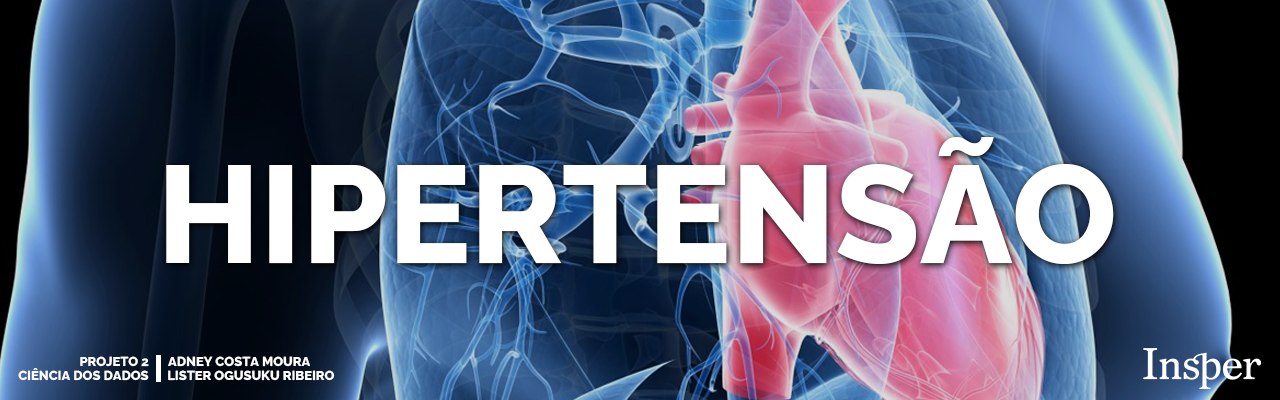

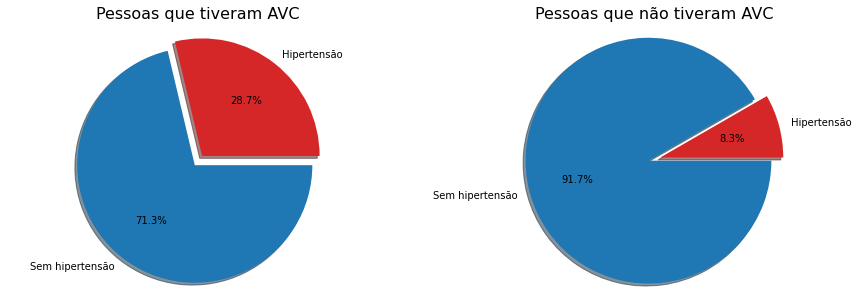

In [14]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Hipertensão', 'Sem hipertensão'

sizes = [stroke_yes.hypertension.value_counts()[1]/stroke_yes.shape[0],
         stroke_yes.hypertension.value_counts()[0]/stroke_yes.shape[0],
         
         stroke_no.hypertension.value_counts()[1]/stroke_no.shape[0],
         stroke_no.hypertension.value_counts()[0]/stroke_no.shape[0] ]

explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.pie(sizes[0:2], explode=explode, labels=labels,colors = ['tab:red','tab:blue'], autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Pessoas que tiveram AVC",size = 16)


plt.subplot(122)
plt.pie(sizes[2:4], explode=explode, labels=labels,colors = ['tab:red','tab:blue'], autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Pessoas que não tiveram AVC",size = 16)

plt.show()

# Doenças do coração

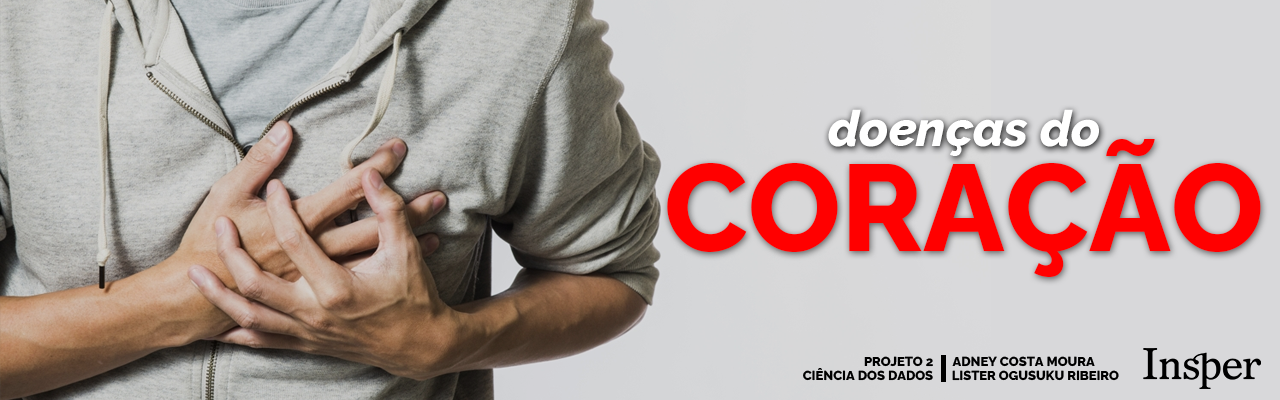

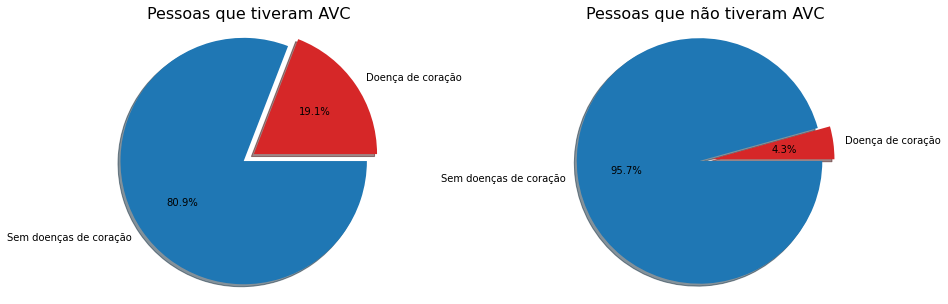

In [15]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Doença de coração', 'Sem doenças de coração'

sizes = [stroke_yes.heart_disease.value_counts()[1]/stroke_yes.shape[0],
         stroke_yes.heart_disease.value_counts()[0]/stroke_yes.shape[0],
         
         stroke_no.heart_disease.value_counts()[1]/stroke_no.shape[0],
         stroke_no.heart_disease.value_counts()[0]/stroke_no.shape[0] ]

explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')


plt.figure(figsize=(15,5))

plt.subplot(121)
plt.pie(sizes[0:2], explode=explode, labels=labels,colors = ['tab:red','tab:blue'], autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Pessoas que tiveram AVC",size = 16)



plt.subplot(122)
plt.pie(sizes[2:4], explode=explode, labels=labels,colors = ['tab:red','tab:blue'], autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Pessoas que não tiveram AVC",size = 16)

plt.show()

# Nível de glicose no sangue

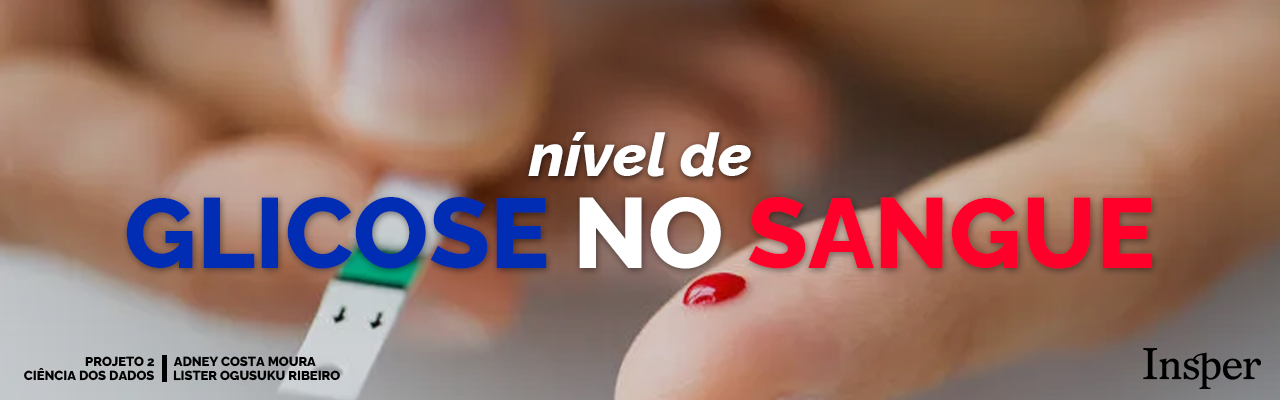

In [16]:
stroke.avg_glucose_level.describe()

count    4908.000000
mean      105.297402
std        44.425550
min        55.120000
25%        77.067500
50%        91.680000
75%       113.495000
max       271.740000
Name: avg_glucose_level, dtype: float64

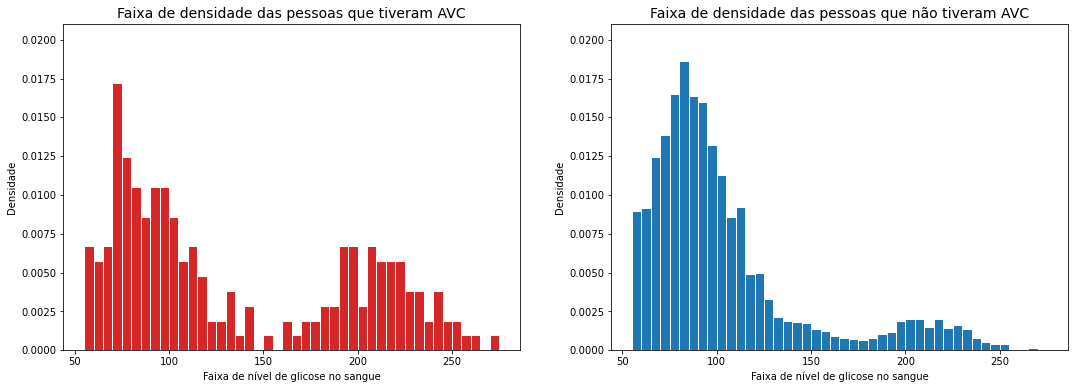

In [17]:
glucose_range = np.arange(55, 280,5)

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.hist(stroke_yes.avg_glucose_level, bins = glucose_range, edgecolor='white', density = True, color = 'tab:red')
plt.title("Faixa de densidade das pessoas que tiveram AVC", size=14)
plt.xlabel("Faixa de nível de glicose no sangue")
plt.ylabel("Densidade")
plt.ylim(0,0.021)

plt.subplot(122)
plt.hist(stroke_no.avg_glucose_level, bins = glucose_range, edgecolor='white', density = True, color = 'tab:blue')
plt.title("Faixa de densidade das pessoas que não tiveram AVC", size=14)
plt.xlabel("Faixa de nível de glicose no sangue")
plt.ylabel("Densidade")
plt.ylim(0,0.021)


plt.show()

# Índice de massa corporal

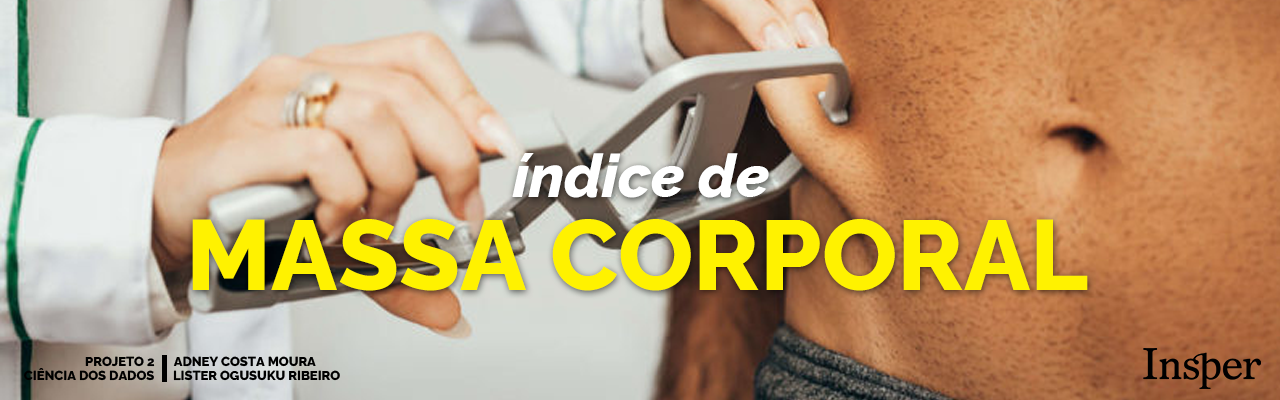

In [18]:
stroke.bmi.describe()

count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

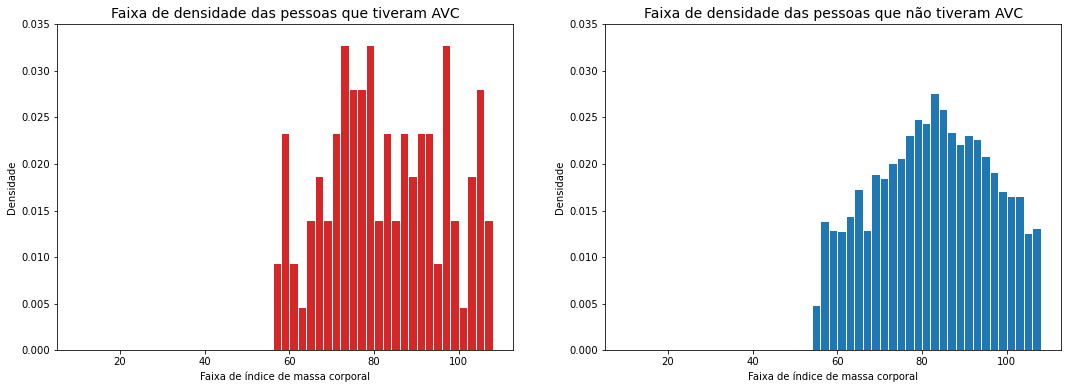

In [19]:
bmi_range = np.arange(10, 110,2)

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.hist(stroke_yes.avg_glucose_level, bins = bmi_range, edgecolor='white', density = True, color = 'tab:red')
plt.title("Faixa de densidade das pessoas que tiveram AVC", size=14)
plt.xlabel("Faixa de índice de massa corporal")
plt.ylabel("Densidade")
plt.ylim(0,0.035)

plt.subplot(122)
plt.hist(stroke_no.avg_glucose_level, bins = bmi_range, edgecolor='white', density = True, color = 'tab:blue')
plt.title("Faixa de densidade das pessoas que não tiveram AVC", size=14)
plt.xlabel("Faixa de índice de massa corporal")
plt.ylabel("Densidade")
plt.ylim(0,0.035)


plt.show()

### Conclusão da análise exploratória

###### Idade

Quando analisamos nossos dados com base na Idade das pessoas, podemos concluir que a incidência de AVC é maior em pessoas mais velhas, logo, quanto mais velho o paciente, maiores podem ser as chances de ele ser acometido por um Acidente Vascular Cerebral.

###### Hipertensão

Quando analisamos nossos dados com base no fator "Hipertensão" das pessoas, podemos concluir que pessoas que não tem hipertensão aparentam ser menos propensas ao acometimento de um AVC; em contrapartida, pessoas que desenvolveram hipertensão podem ter mais chances de também terem um Acidente Vascular Cerebral.

##### Doenças do coração:

Quando analisamos nossos dados com base nas doenças do coração de nossos pacientes, podemos aferir que pessoas que tem doenças de coração são mais propensas ao desenvolvimento de um Acidente Vascular Cerebral do que pessoas que não apresentaram nenhuma anomalia.

##### Nível de Glicose no Sangue:

Quando analisamos nossos dados com base no nível de glicose no sangue das pessoas, podemos aferir que as chances de desenvolver um AVC é relativamente maior em pessoas que apresentaram um nível elevado de glicose no sangue do que entre pessoas que estavam com o nível de glicose adequado.

##### Índice de massa corporal:

Quando analisamos nossos dados com base no índice de massa corporal, podemos concluir que pessoas com um índice de massa corporal maior possuem chances relativamente maiores de desenvolver um Acidente Vascular Cerebral do que quando comparado às pessoas com índices de massa corporal relativamente menores.

### Organização do DataFrame para iniciar as classificações

In [20]:
# Tirando as colunas que consideramos irrelevantes
stroke = stroke.drop(columns = ['id','gender','ever_married','work_type','Residence_type'])

In [21]:
x_dummie = pd.get_dummies(stroke.smoking_status)
stroke = stroke.drop(columns = ['smoking_status'])
stroke = stroke.join(x_dummie)
stroke.head()

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  67.0             0              1             228.69  36.6       1   
2  80.0             0              1             105.92  32.5       1   
3  49.0             0              0             171.23  34.4       1   
4  79.0             1              0             174.12  24.0       1   
5  81.0             0              0             186.21  29.0       1   

   Unknown  formerly smoked  never smoked  smokes  
0        0                1             0       0  
2        0                0             1       0  
3        0                0             0       1  
4        0                0             1       0  
5        0                1             0       0

In [22]:
# Definindo nosso Target e suas Features
features = stroke.drop('stroke', axis = 'columns')
target = stroke['stroke']

### Separando o DataFrame em treinamento e teste

In [23]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.33, random_state=42)

### Decision Tree

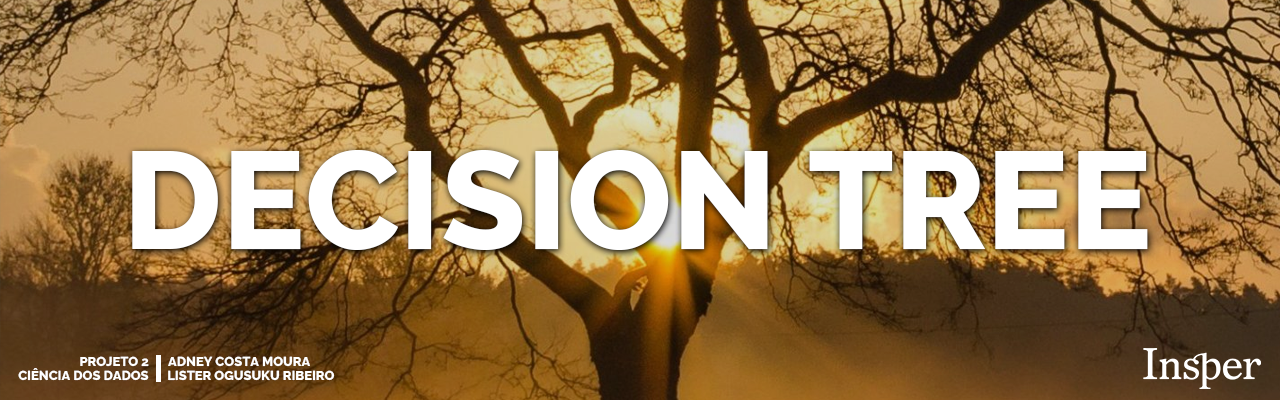

A estrutura "Decision Tree" consiste na criação de vários pontos de decisão. Fazendo uma analogia com uma árvore, podemos dizer que tais pontos seriam as articulações/nós dos ramos da árvore entre um galho e outro e cada ramo seria um caminho a ser seguido. E são esses nós os responsáveis pela indicação de qual ramo deve ser seguido, de forma que uma pergunta será feita e haverá duas opções de resposta, sendo sim ou não. Dessa forma, cada opção levará a uma próxima pergunta - que também terá como resposta um "sim" ou "não", levando, assim, a um determinado resultado.

É válido pontuar, também, que diferentes árvores de decisão podem nos gerar um mesmo resultado e, apesar disso, normalmente não haverá uma única árvore de decisão para um mesmo problema.

Mas como de fato funciona o método de regressão Decision Tree ?

Afim de simplificar nós criamos uma base de dados para mostrar de forma "reduzida" como funciona esse metódo. Nosso DataSet cinsiste em prever se um funcionário tem um salário acima de R$ 10 mil com base na empresa onde ele trabalha, sua função dentro dela e seu nível de formação.

<hr>

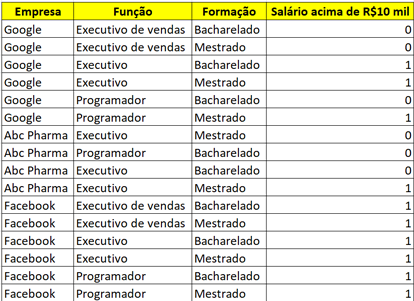

<hr>

Para construir uma Decision Tree nós precisamos separar o DataSet em DataFrames menores afim de analisar com um cuidado maior nossa tentativa de predição (no nosso caso, se o funcionário ganha mais de R$ 10 mil). Começamos portanto separando as pessoas por empresa em que trabalham:

<hr>

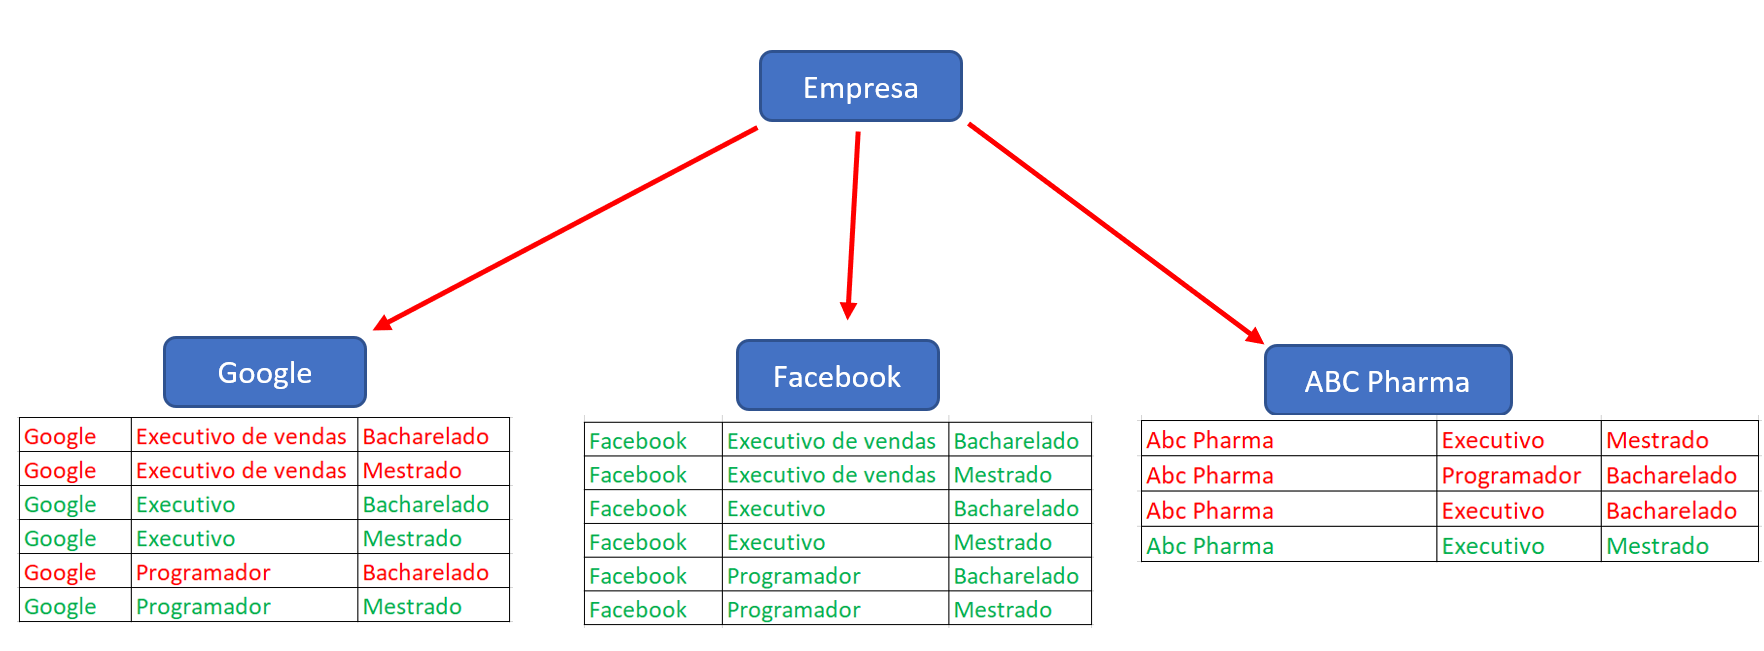

<hr> 

Com essa separação nós já conseguimos tirar algumas conclusões, como o fato de todos os funcionários do Facebook ganharem mais de R$ 10 mil, mas note também que nós ainda não conseguimos concluir algo para os funcionários do Google e da ABC Pharma. É preciso portanto separar novamente essas bases de dados afim de diminuir a aleatoriedade (entropia) do nosso DataFrame. Separaremos portanto com base em outro parâmetro, dessa vez será a função dentro da empresa:

<hr>

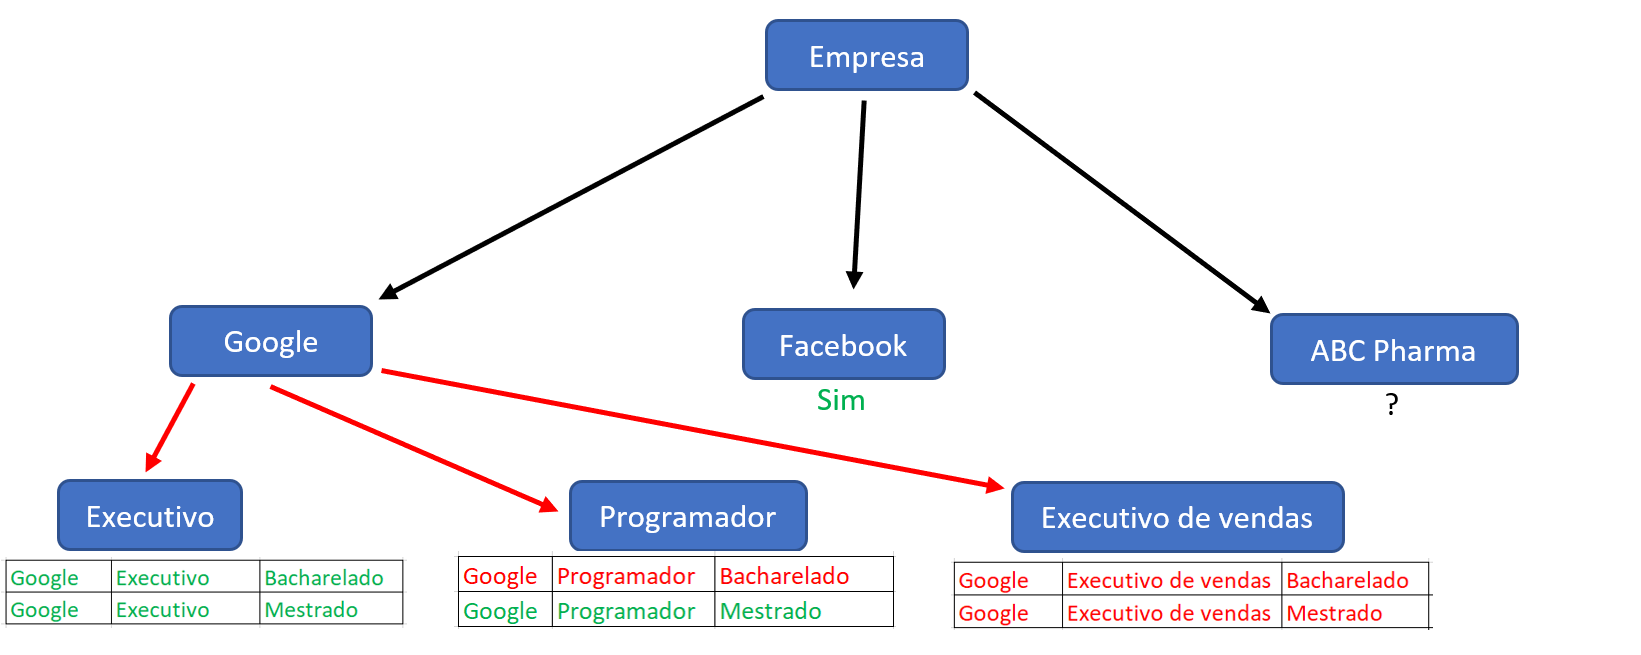

<hr>

Com essa nova separação nós conseguimos obter ainda mais informações, como o fato de que todo executivo do Google ganha mais de R$ 10 mil e de que nenhum executivo de vendas do Google ultrapassa essa quantia. Repetindo esse processo nós conseguimos extrair várias informações e nossa Decision Tree ficará assim:

<hr>

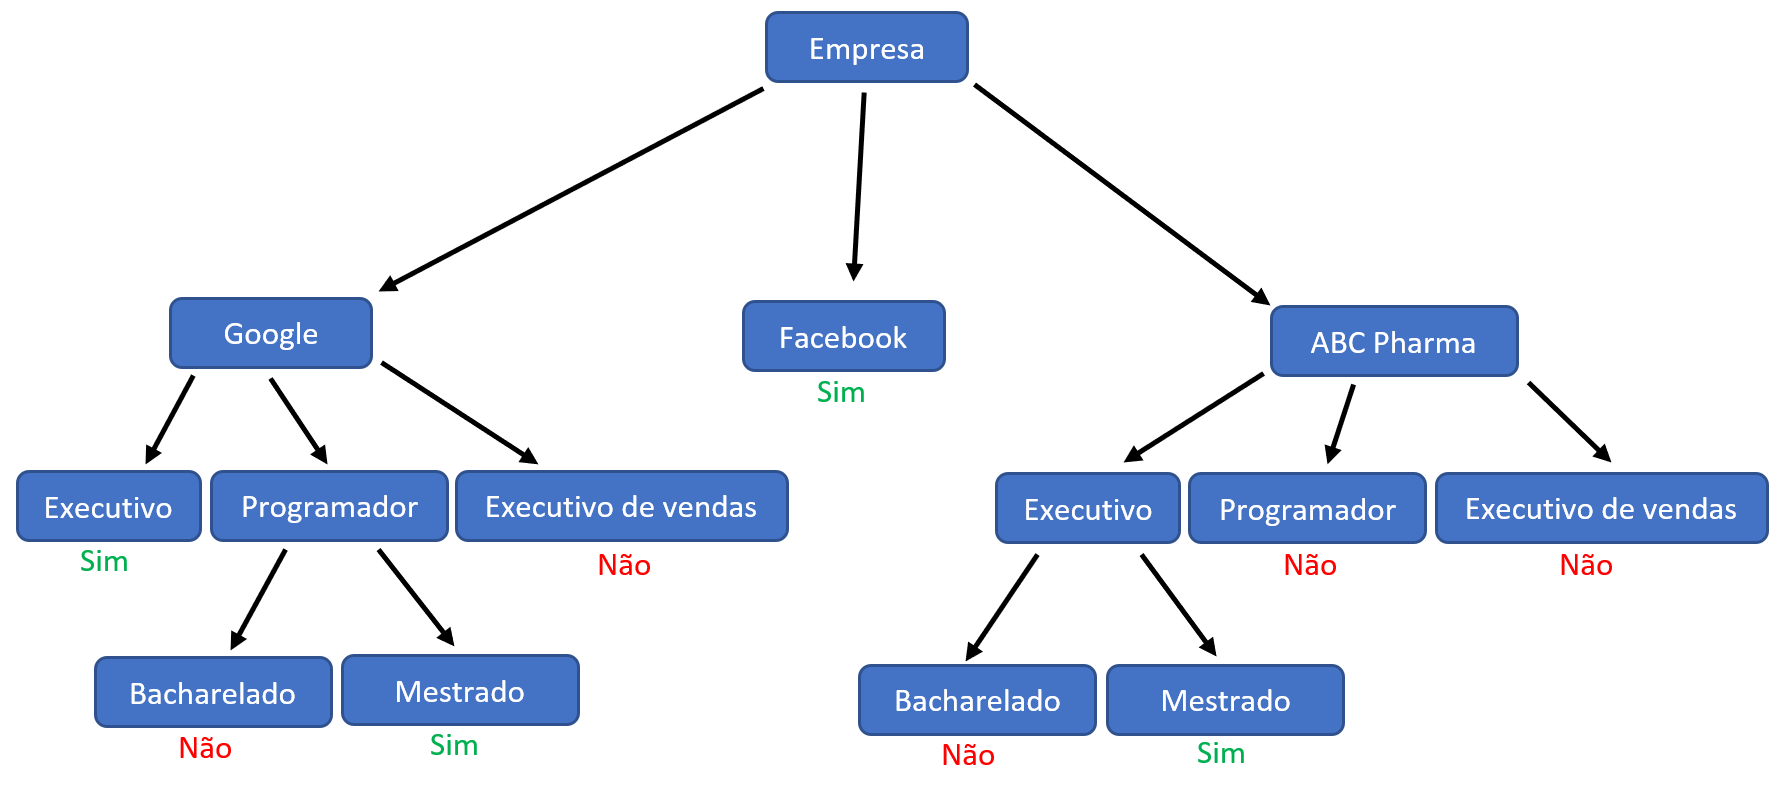

<Hr>

Concluímos portanto que o segredo por trás da decision Tree é dividir o nosso DataSet principal em DataFrames menores e assim conseguir extrair as informações necessárias para predizer nossa pergunta. Mas ainda nos resta uma pergunta a ser respondida: como saber qual feature utilizar primeiro para separar nosso Data Set? Bom, aí nós precisamos conhecer o metódo $Gini$.

###### Gini index

Voltando ao exemplo anterior nós podemos ver que ao sair de um determinado nó de decisão (Internal Nodes) por algumas vezes nós nos deparamos com um DataFrame que continha tanto pessoas que ganhavam menos, quanto pessoas que ganhavam mais de 10 mil reais. Dentro do $Machine Learning$, nós consideramo esses DataFrames como impuros (Impure). Fazendo uma analogia com a físico-química, seria o equivalente a entropia do sistema, e o trabalho da Decision Tree é diminuir essa entropia. Para isso nós contamos com a ajuda do $Gini Index$. Esse index consegue medir a impureza da base de dados e pode ser calculado subtraindo a probabilidade de cada resposta do node de 1:


 $Gini\ index = 1 - \sum(P(x=k))^2$
 
 
 Voltemos ao exemplo para ficar mais fácil a visualização matemática. Observe que ao dividirmos nosso DataSet com base na empresa, nós obtemos alguns DataFrames impuros como resultado, vamos portanto calcular o $Gini\ index$ para a empresas Google:

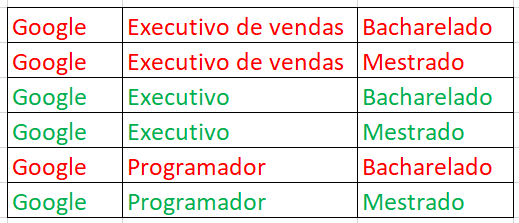

Observe que nesse DataFrame nós temos 3 casos que não se encaixam na nossa predição e 3 que se encaixam, totalizando assim 6 funcionários. Agora vamos as contas:

$Gini\ index = 1 - \sum(P(x=k))^2$

$Gini\ index = 1 - P(x=Sim)^2 - P(x=Não)^2$

$Gini\ index = 1 - (3/6)^2 - (3/6)^2$

$Gini\ index = 1 - 0,5$

$Gini\ index = 0,5$

Concluímos portanto que o índice de $Gini$ para esse DataFrame é de 0,5

Outra utilidade para essa ferramenta é descobrir a ordem das features para formar os Internal Nodes e o primeiro nó (The root) da nossa Decision Tree. Faz-se isso calculando a média ponderada dos DataFrames subsequentes de uma separação por um internal node. Matematicamente tem-se:

$Gini_a(D) = \frac{D_1}{D}Gini(D_1) + \frac{D_2}{D}Gini(D_2)$

Com isso o metódo é capaz de escolher a melhor maneira de organizar as features afim de di

In [24]:
from sklearn import tree
model_dt = tree.DecisionTreeClassifier()

In [25]:
model_dt.fit(features_train, target_train)

DecisionTreeClassifier()

In [26]:
model_dt.score(features_test, target_test)

0.9067901234567901

### Random Forest

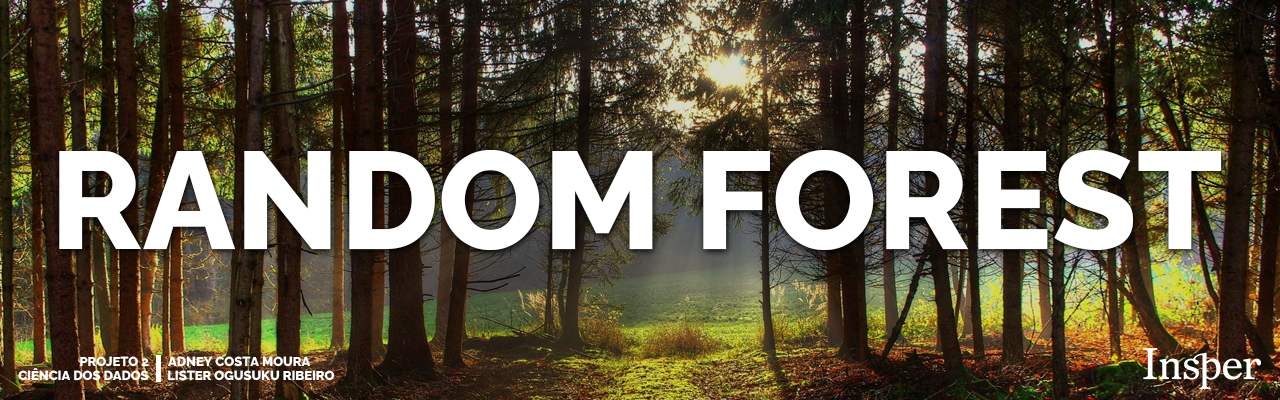

O Random Forest surge como um método de aprimorar nossa análise de dados que acabara de passar pelo Decision Tree.
De forma geral, ao invés de criar apenas uma única árvore de decisão, ele cria várias por meio de um processo repetido inúmeras vezes e o seu resultado final pode consistir, por exemplo, na média de todas essas árvores, obtendo, assim, a probabilidade que eu desejo saber.

Logo, podemos dizer que o Random Forest consiste em uma combinação de árvores independentes entre si.

E por qual motivo isso é tão interessante assim? Basicamente, quando pensamos em capacidade computacional, o Random Forest sai na frente com a possibilidade de colocarmos vários computadores para trabalhar fazendo cada árvore com base em linha e coluna em cima de uma base menor e, ao final, basta pegar todos os dados obtidos, somar tudo e fazer uma média, por exemplo.

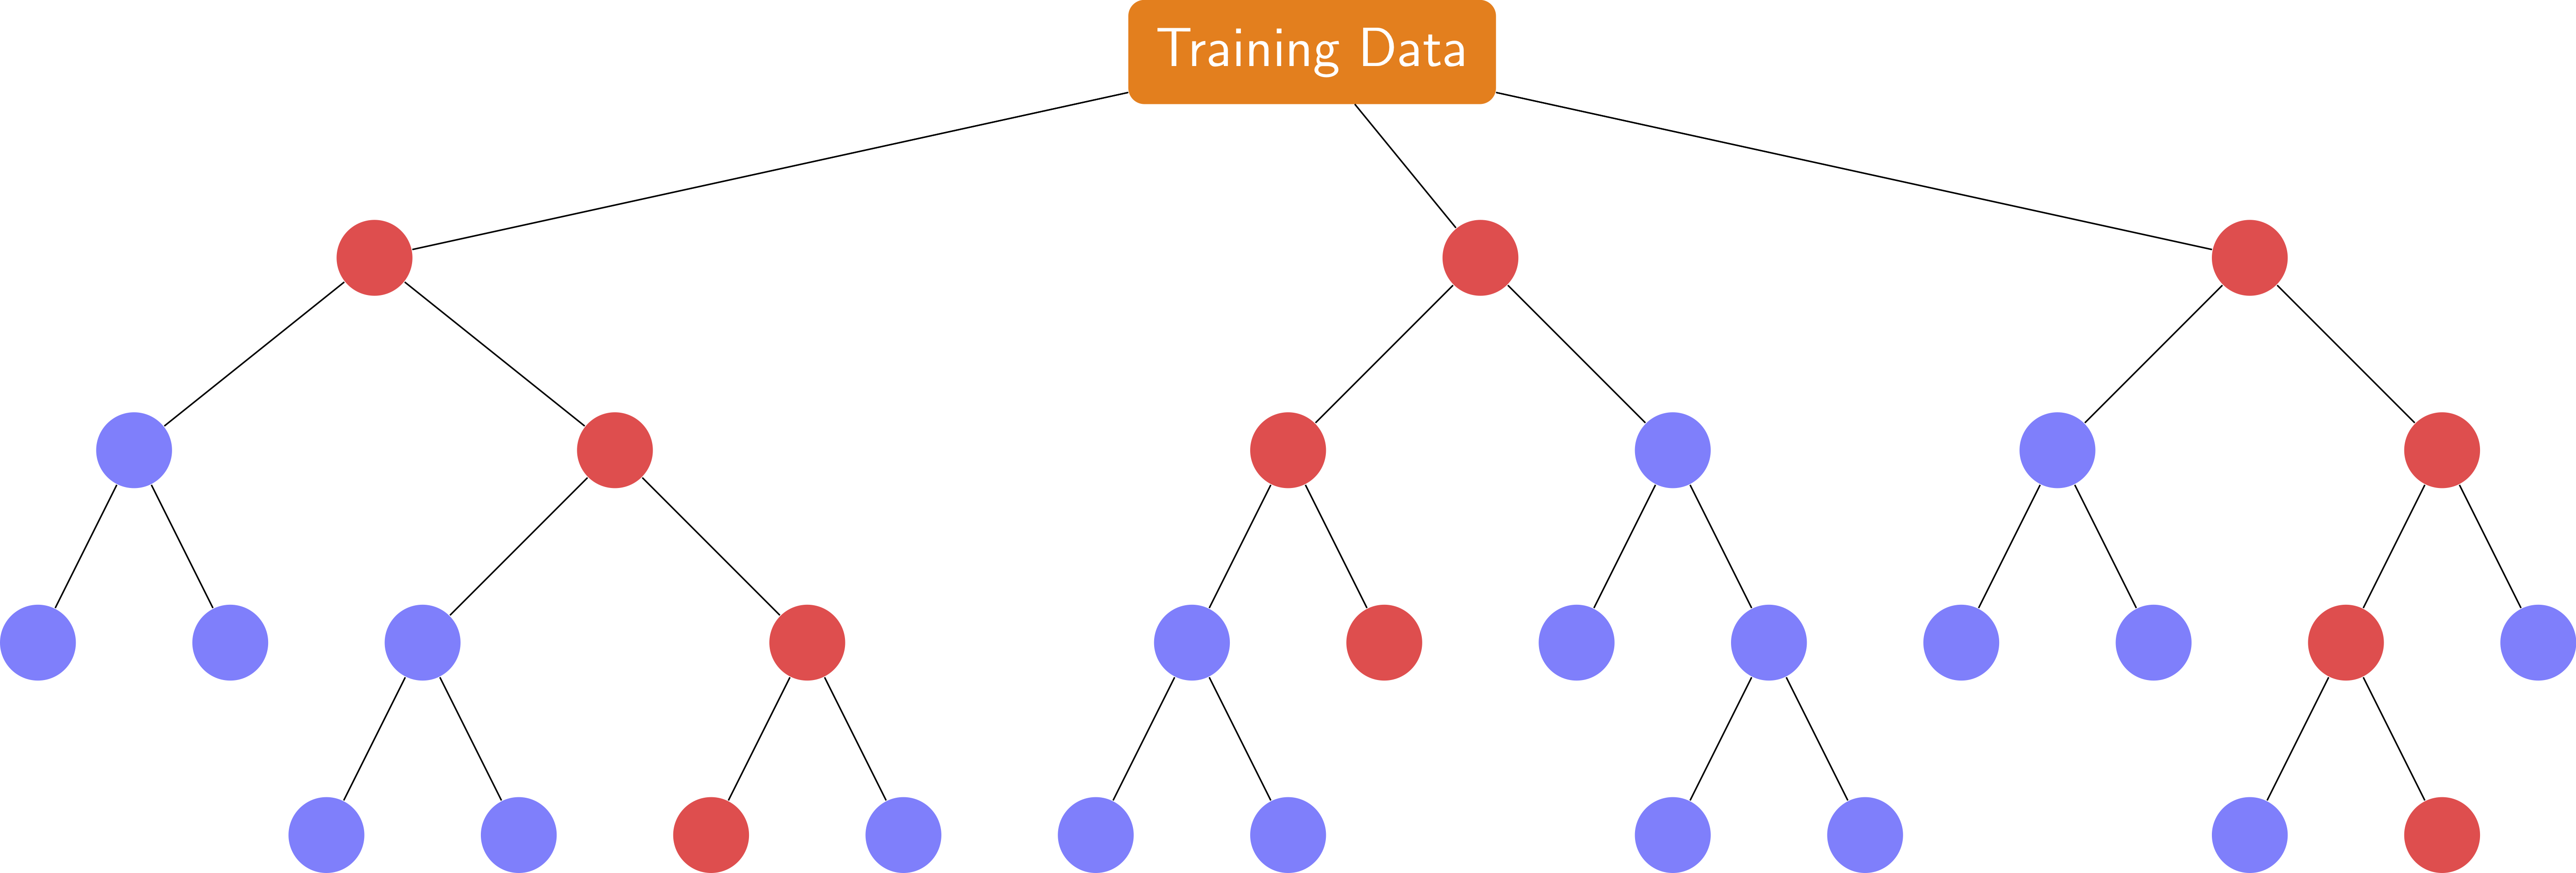

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_rf = RandomForestClassifier(n_estimators=20)

In [28]:
model_rf.fit(features_train, target_train)

RandomForestClassifier(n_estimators=20)

In [29]:
model_rf.score(features_test, target_test)

0.9493827160493827

In [30]:
target_predicted = model_rf.predict(features_test)

In [31]:
accuracy_score(target_test, target_predicted)

0.9493827160493827

Text(69.0, 0.5, 'Truth')

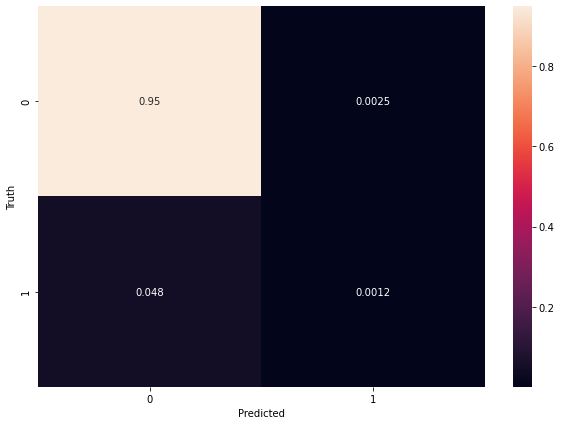

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test, target_predicted,normalize='all')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Análise da matriz de confusão

Analisando a matriz de confusão obtida, pode-se aferir que ela está tendenciosa, puxando para um único lado (que seria o de dizer que as pessoas não teriam AVC). Isso se deve ao fato de a nossa base de dados ter uma quantidade muito maior de pessoas que não tiveram um AVC do que as que tiveram, logo, seu acerto é de apenas 2 casos de AVC contabilizados.

In [33]:
stroke.head()

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  67.0             0              1             228.69  36.6       1   
2  80.0             0              1             105.92  32.5       1   
3  49.0             0              0             171.23  34.4       1   
4  79.0             1              0             174.12  24.0       1   
5  81.0             0              0             186.21  29.0       1   

   Unknown  formerly smoked  never smoked  smokes  
0        0                1             0       0  
2        0                0             1       0  
3        0                0             0       1  
4        0                0             1       0  
5        0                1             0       0

Média dos scores das 100 simulações realizadas: 0.7640579710144921


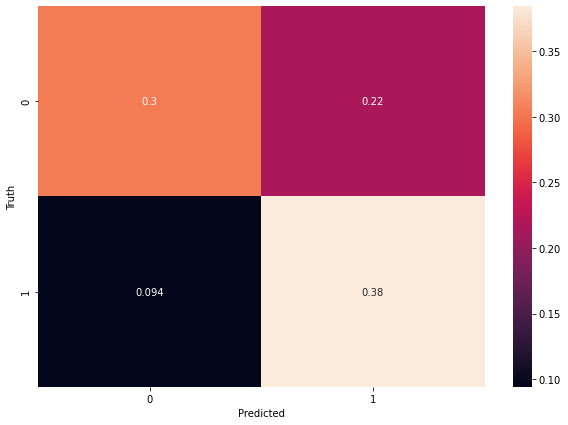

In [34]:
stroke_0 = stroke.copy()
stroke_1 = stroke.copy()

stroke_0 = stroke_0.loc[stroke.stroke == 0]
stroke_1 = stroke_1.loc[stroke.stroke == 1]

lista = []
samples = range(0,100)

for i in samples:

    # Gerando números aleatórios para selecionar na base stroke_0
    x = np.random.randint(0, stroke_0.shape[0], stroke_1.shape[0])

    # Gerando o novo DataFrame com a mesma quantidade da base stroke_1
    stroke_0_new = stroke_0.iloc[x,:]

    # Juntando os DataFrames novamente
    stroke_new = pd.concat([stroke_0_new, stroke_1])
    
    # Redefinindo nosso Target e suas Features
    features = stroke_new.drop('stroke', axis = 'columns')
    target = stroke_new['stroke']
    
    # Separando nossa base de dados em treinamento e teste
    features_train,features_test,target_train,target_test = train_test_split(features, target, test_size=0.33, random_state=42)
    
    # Gerando o modelo Random Forest
    model_rf = RandomForestClassifier(n_estimators=20)
    
    # Treinando o modelo
    model_rf.fit(features_train, target_train)
    
    # Adcionando o score do modelo em uma lista
    lista.append(model_rf.score(features_test, target_test))
    
    # Predição do target
    target_predicted = model_rf.predict(features_test)



cm = confusion_matrix(target_test, target_predicted, normalize='all')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


lista = pd.Series(lista)
print(f"Média dos scores das 100 simulações realizadas: {lista.mean()}")

### Conclusões finais

##### Bibliografia

* https://www.datacamp.com/community/tutorials/decision-tree-classification-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377095&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1001773&gclid=Cj0KCQjw--GFBhDeARIsACH_kdax0zHKcjcTkcNO42SpJJj_DhHPc7ctJcqlpec_a14kzG-4qZqnvNMaApRyEALw_wcB

* https://didatica.tech/como-funciona-o-algoritmo-arvore-de-decisao/

* https://www.youtube.com/watch?v=noy13V1nTz4

* https://www.youtube.com/watch?v=W7MfsE5av0c

* https://towardsdatascience.com/what-is-a-decision-tree-22975f00f3e1

* https://medium.com/turing-talks/turing-talks-17-modelos-de-predi%C3%A7%C3%A3o-decision-tree-610aa484cb05

* https://blog.clairvoyantsoft.com/entropy-information-gain-and-gini-index-the-crux-of-a-decision-tree-99d0cdc699f4